In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize']=(18, 8)

%matplotlib inline

In [49]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import t
from scipy import stats


In [50]:
# Загружаем памятники из ОКН

monuments_OKN = pd.read_excel('C:/00_Projects/Lenin/Datasets/02_Monuments/08_lenin_reestrOKN.xlsx',
                              sheet_name='need')

In [51]:
# Загружаем памятники из базы leninstatues

monuments_lst = pd.read_excel('C:/00_Projects/Lenin/Datasets/02_Monuments/09_lenin_monuments.xlsx',
                              sheet_name='af1991')

In [52]:
monuments_OKN.columns

Index(['monument', 'region', 'mun_district', 'city_type', 'city_type_2',
       'city', 'adress', 'culture_category', 'normative_doc', 'doc_date',
       'add_year'],
      dtype='object')

In [53]:
monuments_OKN_af1991 = monuments_OKN[['monument',
 'region', 'mun_district', 'city_type_2', 'city',
 'culture_category',
 'normative_doc', 'doc_date', 'add_year']]

In [54]:
monuments_OKN_af1991 = monuments_OKN_af1991[monuments_OKN_af1991.add_year > 1991]

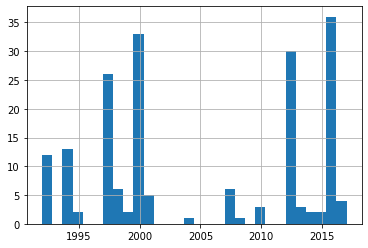

In [55]:
monuments_OKN_af1991.add_year.hist(bins=30)

In [56]:
monuments_OKN_af1991

,monument,region,mun_district,city_type_2,city,culture_category,normative_doc,doc_date,add_year
49,Памятник Ленину В.И.,Алтайский край,Барнаул,город,Барнаул,Регионального значения,Постановление Алтайского краевого Совета народ...,2000-10-31,2000
50,Памятник В.И. Ленину,Алтайский край,Заринск,город,Заринск,Регионального значения,Постановление Алтайского краевого Законодатель...,1994-12-28,1994
123,Памятник В.И. Ленину,Владимирская область,Владимир,город,Владимир,Регионального значения,Постановление Главы администрации Владимирской...,1997-10-13,1997
125,Памятник В.И. Ленину,Владимирская область,Гусь-Хрустальный,город,Гусь-Хрустальный,Местного (муниципального) значения,Закон Владимирской области «Об объявлении объе...,2008-12-24,2008
129,Памятник В.И. Ленину,Волгоградская область,Волгоград,город,Волгоград,Регионального значения,О постановке на государственную охрану памятни...,1997-06-05,1997
...,...,...,...,...,...,...,...,...,...
1286,Памятник В.И. Ленину,Хабаровский край,Комсомольск-на-Амуре,город,Комсомольск-на-Амуре,Регионального значения,Постановление Законодательной Думы Хабаровског...,1998-02-11,1998
1303,Памятник В.И. Ленину,Челябинская область,Озерск,город,Озерск,Местного (муниципального) значения,постановление Правительства Челябинской област...,2010-03-18,2010
1305,Памятник В.И. Ленину,Челябинская область,Челябинск,город,Челябинск,Регионального значения,Постановление Губернатора Челябинской области ...,1998-01-12,1998
1308,Памятник Ленину В.И.,Чукотский АО,Анадырь,город,Анадырь,Регионального значения,Постановление Вице-Губернатора Чукотского АО,1997-08-27,1997


In [57]:
(monuments_OKN_af1991
 .groupby(['region', 'mun_district', 'city_type_2', 'city', 'add_year'], as_index=False)
 .agg({'monument': 'count'})
)


,region,mun_district,city_type_2,city,add_year,monument
0,Алтайский край,Барнаул,город,Барнаул,2000,1
1,Алтайский край,Заринск,город,Заринск,1994,1
2,Владимирская область,Владимир,город,Владимир,1997,1
3,Владимирская область,Гусь-Хрустальный,город,Гусь-Хрустальный,2008,1
4,Волгоградская область,Волгоград,город,Волгоград,1997,2
...,...,...,...,...,...,...
162,Хабаровский край,Комсомольск-на-Амуре,город,Комсомольск-на-Амуре,1998,1
163,Челябинская область,Озерск,город,Озерск,2010,1
164,Челябинская область,Челябинск,город,Челябинск,1998,1
165,Чукотский АО,Анадырь,город,Анадырь,1997,1


In [58]:
(monuments_OKN_af1991
 .groupby(['region', 'add_year'], as_index=False)
 .agg({'monument': 'count'})
 .sort_values('add_year')
)

#.to_excel('C:/00_Projects/Lenin/Datasets/05_for_viz/new_monuments.xlsx')


,region,add_year,monument
29,Ростовская область,1992,12
0,Алтайский край,1994,1
30,Ростовская область,1994,12
39,Ставропольский край,1995,2
44,Тыва,1997,2
42,Тверская область,1997,1
40,Ставропольский край,1997,2
31,Рязанская область,1997,1
24,Орловская область,1997,1
22,Москва,1997,2


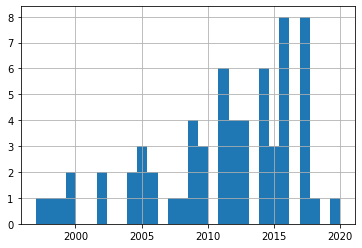

In [59]:
monuments_lst_af1991[monuments_lst_af1991.date_2 != 0].date_2.hist(bins=30)

In [47]:
#monuments_lst_af1991.region.value_counts().reset_index().to_excel('C:/00_Projects/Lenin/Datasets/05_for_viz/temp.xlsx')


In [63]:
monuments_lst_af1991

,original_name,region,mun_district,city_type,city_type_2,city,adress,description,status,condition,date_1,date_2
0,Дукмасово,Адыгея,Шовгеновский,х,хутор,Дукмасов,Дукмасово,Памятник установлен 27 августа 2014 года.,существующий,NaN,после 1991 года,2014
1,Майма,Алтай,Майминский,с,село,Майма,Майма,NaN,существующий,NaN,после 1991 года,2008
2,Турочак,Алтай,Турочакский,с,село,Турочак,Турочак,NaN,существующий,NaN,после 1991 года,0
3,Вельск,Архангельская область,Вельский,г,город,Вельск,Вельск,NaN,существующий,NaN,после 1991 года,0
4,Котлас,Архангельская область,Котласский,г,город,Котлас,Котлас,В сквере напротив районной администрации (Площ...,существующий,NaN,после 1991 года,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
64,Сургут,Ханты-Мансийский АО,Сургут,г,город,Сургут,Сургут,NaN,существующий,NaN,после 1991 года,2005
65,Карталы,Челябинская область,Карталинский,г,город,Карталы,Карталы,Установлен в 2002 году.,существующий,NaN,после 1991 года,2002
66,Миасс (пос. Лесной-2),Челябинская область,Миасс,г,город,Миасс,Миасс (пос. Лесной-2),"Установлен в ноябре 2013 года, по некоторым да...",существующий,NaN,после 1991 года,2013
67,Новые Чукалы,Чувашия,Шемуршинский,д,деревня,Новые Чукалы,Новые Чукалы,Открыт 4 августа 2016 года.,существующий,NaN,после 1991 года,2016


In [61]:
monuments_lst_af1991.city_type_2.value_counts()

город                      36
село                       13
поселок городского типа     7
рабочий поселок             5
поселок                     4
станица                     2
деревня                     1
хутор                       1
Name: city_type_2, dtype: int64

In [72]:
monuments_lst_af1991_region = (monuments_lst_af1991
 .groupby(['region', 'mun_district', 'city_type', 'city', 'date_2'], as_index=False)
 .agg({'original_name': 'count'})
 .sort_values('date_2')
)

In [77]:
monuments_lst_af1991_region.region.value_counts().shape

(36,)

In [76]:
monuments_lst_af1991_region.head(15)

,region,mun_district,city_type,city,date_2,original_name
2,Алтай,Турочакский,с,Турочак,0,1
3,Архангельская область,Вельский,г,Вельск,0,1
37,Крым,Алушта,с,Приветное,0,1
33,Коми,Усть-Вымский,с,Айкино,0,1
12,Белгородская область,Новооскольский,г,Новый Оскол,0,1
43,Липецкая область,Воловский,с,Волово,1997,1
49,Мурманская область,Полярные Зори,г,Полярные Зори,1998,1
53,Новосибирская область,Новосибирск,г,Новосибирск,1999,1
28,Кабардино-Балкария,Прохладненский,ст-ца,Солдатская,2000,1
50,Нижегородская область,Кстовский,с,Работки,2000,1
